In [1]:
import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
perturbagen_class = pickle.load(open("../data/all_perturbagen_class.pkl", "rb"))

In [3]:
perturbagens = list(perturbagen_class.keys())

In [4]:
def make_df(perturbagen_cells, perturbagen_class):
    all_cells = []
    for perturbagen in perturbagen_cells:
        all_cells = all_cells+list(perturbagen_cells[perturbagen])
    all_cells = np.unique(all_cells)
    data = pd.DataFrame()
    data["perturbagen_id"] = perturbagens
    data["perturbagen_class"] = [perturbagen_class[perturbagen] for perturbagen in perturbagens]
    data["atc_level_one"] = [perturbagen_class[perturbagen][0] for perturbagen in perturbagens]
    
    for perturbagen in perturbagens:
        if len(perturbagen_cells[perturbagen])==0:
            data.drop(data[data['perturbagen_id']==perturbagen].index, inplace = True)
            continue
        for cell_line in perturbagen_cells[perturbagen]:
            if cell_line not in data.columns:
                data[cell_line] = [0 for a in range(len(data))]
            data.loc[data["perturbagen_id"]==perturbagen, cell_line] = 1
    
    return data

def plot_graphs(data, top_count=10):
    frequency_tuple = [(np.sum(data[cell_line])/len(data), cell_line) for cell_line in data.columns[3:]]
    frequency_tuple.sort(reverse=True)
    plt.figure(figsize=(20, 6))
    cell_lines = [item[1] for item in frequency_tuple]
    frequency = [item[0] for item in frequency_tuple]
    plt.bar(cell_lines[:top_count], frequency[:top_count])
    plt.show()
    
    atc_level_one = np.unique(data["atc_level_one"])
    freq_cell_lines = cell_lines[:top_count]
    class_vs_cell = []
    for l1_class in atc_level_one:
        class_data = data[data["atc_level_one"]==l1_class]
        freq_cell_data = class_data[freq_cell_lines]
        class_vs_cell.append(freq_cell_data.sum()/len(freq_cell_data))
    
    plt.figure(figsize=(20,10))
    sns.heatmap(class_vs_cell, yticklabels=atc_level_one, xticklabels=freq_cell_lines, cmap="YlGnBu", annot=True)


### Perturbagens from REST

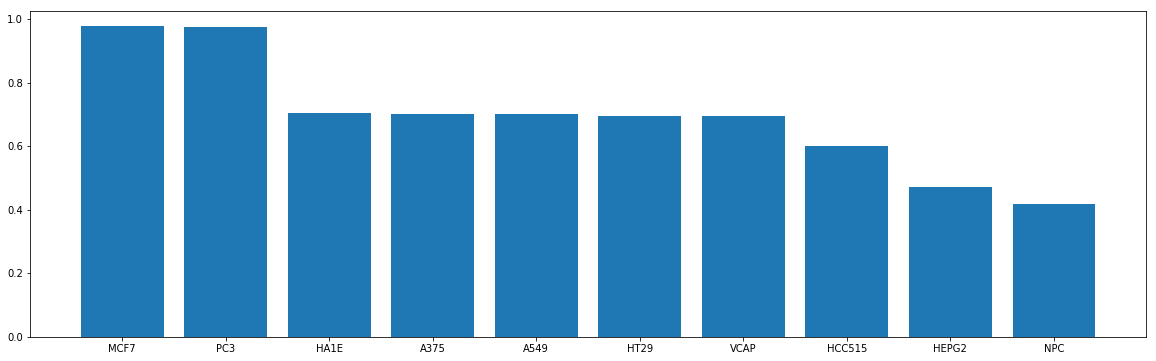

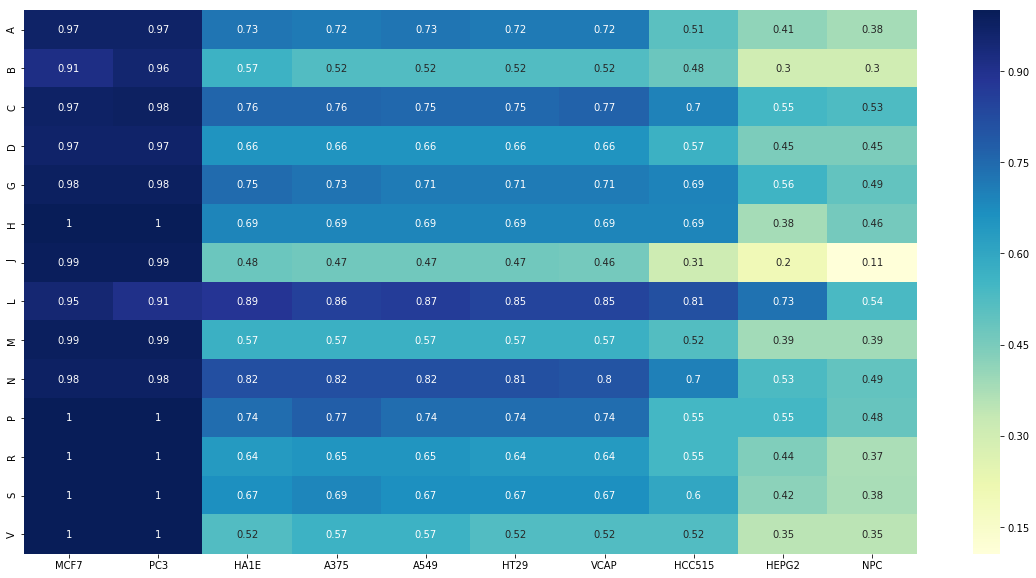

In [5]:
perturbagen_cells_rest = pickle.load(open("../data/perturbagen_cells_rest.pkl", "rb"))
data_rest = make_df(perturbagen_cells_rest, perturbagen_class)
plot_graphs(data_rest)

### Perturbagens from Metadata

In [7]:
# signatures = pd.read_csv("")
# signatures.head(100)